# Observations of Pairwise comparisons.
There is significant difference among all the companies in terms of work balance except for 1 pair: netflix and apple.

There is significant difference among all the companies in terms of culture values and senior management except for 2 pairs: netflix-amazon and microsoft-netflix.

There is significant difference among all the companies in terms of overall ratings except for 2 pairs: netflix-amazon and google-facebook.

All pairwise comparisons among the companies in terms of career opportunities and the benefits showed significant difference between all the pairs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from function_creation import draw_chart,draw_chart2, print_label, calc_means, calc_sems, count_sample

In [2]:
#read, select, and rename the columns
df = pd.read_csv("employee_reviews.csv",encoding="utf-8")
df=df[['Unnamed: 0','company', 'location','dates','job-title','overall-ratings','work-balance-stars','culture-values-stars','carrer-opportunities-stars','comp-benefit-stars','senior-mangemnet-stars']]
df=df.rename(columns={'Unnamed: 0':'0','job-title':'emp_status','overall-ratings':'overall_rating', 'work-balance-stars':'work_balance','culture-values-stars':'culture_values','carrer-opportunities-stars':'career_opp','comp-benefit-stars':'benefits', 'senior-mangemnet-stars':'Senior_mgmt'})
df.head()

,0,company,location,dates,emp_status,overall_rating,work_balance,culture_values,career_opp,benefits,Senior_mgmt
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,5.0,4.0,5.0,5.0,4.0,5.0
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,4.0,2.0,3.0,3.0,5.0,3.0
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,5.0,5.0,4.0,5.0,5.0,4.0
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,5.0,2.0,5.0,5.0,4.0,5.0
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,5.0,5.0,5.0,5.0,5.0,5.0


In [3]:
# clean, split, and keep only the year of 'dates' column
df['overall_rating'].value_counts()
df['dates'].dropna(inplace = True) 
df[['date','year']]=df['dates'].str.split( ", ", expand=True)
df1=df.drop(['dates','date'], axis=1)

df1=df1[df1['year'] != '0000'] 
df1=df1[df1['year'] !=  None]  

df1.head() 

,0,company,location,emp_status,overall_rating,work_balance,culture_values,career_opp,benefits,Senior_mgmt,year
0,1,google,none,Current Employee - Anonymous Employee,5.0,4.0,5.0,5.0,4.0,5.0,2018
1,2,google,"Mountain View, CA",Former Employee - Program Manager,4.0,2.0,3.0,3.0,5.0,3.0,2013
2,3,google,"New York, NY",Current Employee - Software Engineer III,5.0,5.0,4.0,5.0,5.0,4.0,2014
3,4,google,"Mountain View, CA",Current Employee - Anonymous Employee,5.0,2.0,5.0,5.0,4.0,5.0,2015
4,5,google,"Los Angeles, CA",Former Employee - Software Engineer,5.0,5.0,5.0,5.0,5.0,5.0,2018


In [4]:
# split the 'title' column into 'status' and 'position' columns
# drop the 'title' column
a= df1['emp_status'].str.split( " - ", expand=True)
df1['status']=a[0]
df1['position']=a[1]
df2=df1.drop(['emp_status'], axis=1)
df2.head()

,0,company,location,overall_rating,work_balance,culture_values,career_opp,benefits,Senior_mgmt,year,status,position
0,1,google,none,5.0,4.0,5.0,5.0,4.0,5.0,2018,Current Employee,Anonymous Employee
1,2,google,"Mountain View, CA",4.0,2.0,3.0,3.0,5.0,3.0,2013,Former Employee,Program Manager
2,3,google,"New York, NY",5.0,5.0,4.0,5.0,5.0,4.0,2014,Current Employee,Software Engineer III
3,4,google,"Mountain View, CA",5.0,2.0,5.0,5.0,4.0,5.0,2015,Current Employee,Anonymous Employee
4,5,google,"Los Angeles, CA",5.0,5.0,5.0,5.0,5.0,5.0,2018,Former Employee,Software Engineer


In [5]:
#  reorder the columns and dropping NanS
df3=df2[['0','company', 'location','year','status','position','overall_rating',
         'work_balance','culture_values','career_opp','benefits','Senior_mgmt']]

df3["work_balance"] = pd.to_numeric(df["work_balance"], errors = "coerce")
df3["overall_rating"] = pd.to_numeric(df["overall_rating"], errors = "coerce")
df3["culture_values"] = pd.to_numeric(df["culture_values"], errors = "coerce")
df3["career_opp"] = pd.to_numeric(df["career_opp"], errors = "coerce")
df3["benefits"] = pd.to_numeric(df["benefits"], errors = "coerce")
df3["Senior_mgmt"] = pd.to_numeric(df["Senior_mgmt"], errors = "coerce")
df3 = df3.dropna(how = "any")
df3.count()
df3.head(100)

df3

,0,company,location,year,status,position,overall_rating,work_balance,culture_values,career_opp,benefits,Senior_mgmt
0,1,google,none,2018,Current Employee,Anonymous Employee,5.0,4.0,5.0,5.0,4.0,5.0
1,2,google,"Mountain View, CA",2013,Former Employee,Program Manager,4.0,2.0,3.0,3.0,5.0,3.0
2,3,google,"New York, NY",2014,Current Employee,Software Engineer III,5.0,5.0,4.0,5.0,5.0,4.0
3,4,google,"Mountain View, CA",2015,Current Employee,Anonymous Employee,5.0,2.0,5.0,5.0,4.0,5.0
4,5,google,"Los Angeles, CA",2018,Former Employee,Software Engineer,5.0,5.0,5.0,5.0,5.0,5.0
5,6,google,"Mountain View, CA",2018,Former Employee,SDE2,5.0,4.0,4.0,4.0,5.0,4.0
6,7,google,"New York, NY",2018,Current Employee,Software Engineer,5.0,5.0,4.0,4.0,5.0,4.0
7,8,google,none,2018,Former Employee,Anonymous Employee,5.0,5.0,5.0,5.0,5.0,5.0
8,9,google,"New York, NY",2018,Current Employee,Anonymous Employee,5.0,5.0,5.0,5.0,5.0,5.0
9,10,google,none,2018,Current Employee,Anonymous Employee,5.0,5.0,5.0,5.0,5.0,5.0


In [6]:
# Subsetting df3 by year 2013-2018
yearsdf3 = df3.loc[df3["year"].isin(["2014", "2015", "2016", "2017", "2018"])]
yearsdf3

,0,company,location,year,status,position,overall_rating,work_balance,culture_values,career_opp,benefits,Senior_mgmt
0,1,google,none,2018,Current Employee,Anonymous Employee,5.0,4.0,5.0,5.0,4.0,5.0
2,3,google,"New York, NY",2014,Current Employee,Software Engineer III,5.0,5.0,4.0,5.0,5.0,4.0
3,4,google,"Mountain View, CA",2015,Current Employee,Anonymous Employee,5.0,2.0,5.0,5.0,4.0,5.0
4,5,google,"Los Angeles, CA",2018,Former Employee,Software Engineer,5.0,5.0,5.0,5.0,5.0,5.0
5,6,google,"Mountain View, CA",2018,Former Employee,SDE2,5.0,4.0,4.0,4.0,5.0,4.0
6,7,google,"New York, NY",2018,Current Employee,Software Engineer,5.0,5.0,4.0,4.0,5.0,4.0
7,8,google,none,2018,Former Employee,Anonymous Employee,5.0,5.0,5.0,5.0,5.0,5.0
8,9,google,"New York, NY",2018,Current Employee,Anonymous Employee,5.0,5.0,5.0,5.0,5.0,5.0
9,10,google,none,2018,Current Employee,Anonymous Employee,5.0,5.0,5.0,5.0,5.0,5.0
10,11,google,"Mountain View, CA",2018,Current Employee,Anonymous Employee,5.0,4.0,5.0,4.0,4.0,3.0


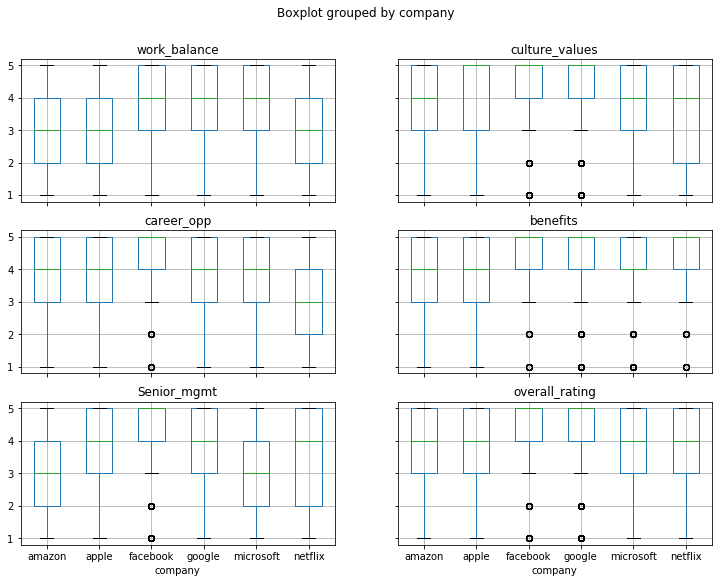

In [7]:
# Create a boxplot to compare means
yearsdf3.boxplot(column=["work_balance", "culture_values", "career_opp", "benefits", "Senior_mgmt", "overall_rating"], by="company", figsize = (12, 9))
plt.savefig("./Images/Statistical_Testing/boxplots.png")
plt.show()

##  a) work_balance_ratings ANOVA and Pairwise Comparisons

In [47]:
# Is there a difference between the 6 companies in terms of their work_balance?

# Extract individual groups
group1 = yearsdf3[yearsdf3["company"] == "amazon"]["work_balance"]
group2 = yearsdf3[yearsdf3["company"] == "apple"]["work_balance"]
group3 = yearsdf3[yearsdf3["company"] == "facebook"]["work_balance"]
group4 = yearsdf3[yearsdf3["company"] == "google"]["work_balance"]
group5 = yearsdf3[yearsdf3["company"] == "microsoft"]["work_balance"]
group6 = yearsdf3[yearsdf3["company"] == "netflix"]["work_balance"]

In [48]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5, group6)

F_onewayResult(statistic=668.1186336920713, pvalue=0.0)

In [49]:
# Running pairwise comparisons
work_balance_mc = MultiComparison(yearsdf3['work_balance'], yearsdf3['company'])
result = work_balance_mc.tukeyhsd()

print(result)
print(work_balance_mc.groupsunique)

 Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1    group2  meandiff  lower   upper  reject
---------------------------------------------------
  amazon    apple    0.3192   0.2736  0.3648  True 
  amazon   facebook  0.843    0.7344  0.9516  True 
  amazon    google   0.9867   0.9294  1.044   True 
  amazon  microsoft  0.5832   0.5402  0.6263  True 
  amazon   netflix   0.221    0.0383  0.4037  True 
  apple    facebook  0.5238   0.4115  0.636   True 
  apple     google   0.6675   0.6035  0.7315  True 
  apple   microsoft  0.264    0.2123  0.3156  True 
  apple    netflix  -0.0982  -0.2832  0.0867 False 
 facebook   google   0.1437   0.0262  0.2612  True 
 facebook microsoft -0.2598   -0.371 -0.1485  True 
 facebook  netflix   -0.622  -0.8316 -0.4124  True 
  google  microsoft -0.4035  -0.4657 -0.3413  True 
  google   netflix  -0.7657  -0.9539 -0.5775  True 
microsoft  netflix  -0.3622  -0.5465 -0.1779  True 
---------------------------------------------------
['amazon' 'a

##   b)  Culture_value ratings ANOVA and Pairwise Comparisons

In [50]:
# Is there a difference between the 6 companies in terms of their culture_values?

# Extract individual groups
group1 = yearsdf3[yearsdf3["company"] == "amazon"]["culture_values"]
group2 = yearsdf3[yearsdf3["company"] == "apple"]["culture_values"]
group3 = yearsdf3[yearsdf3["company"] == "facebook"]["culture_values"]
group4 = yearsdf3[yearsdf3["company"] == "google"]["culture_values"]
group5 = yearsdf3[yearsdf3["company"] == "microsoft"]["culture_values"]
group6 = yearsdf3[yearsdf3["company"] == "netflix"]["culture_values"]

In [51]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5, group6)

F_onewayResult(statistic=565.468676689026, pvalue=0.0)

In [52]:
# Running pairwise comparisons
culture_values_mc = MultiComparison(yearsdf3['culture_values'], yearsdf3['company'])
result = culture_values_mc.tukeyhsd()

print(result)
print(culture_values_mc.groupsunique)

 Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1    group2  meandiff  lower   upper  reject
---------------------------------------------------
  amazon    apple    0.5651    0.52   0.6101  True 
  amazon   facebook  0.9448   0.8376  1.052   True 
  amazon    google   0.8209   0.7643  0.8774  True 
  amazon  microsoft  0.1742   0.1317  0.2167  True 
  amazon   netflix   0.0506  -0.1299  0.231  False 
  apple    facebook  0.3798   0.2689  0.4906  True 
  apple     google   0.2558   0.1926  0.319   True 
  apple   microsoft -0.3909  -0.4419 -0.3399  True 
  apple    netflix  -0.5145  -0.6971 -0.3319  True 
 facebook   google   -0.124   -0.24   -0.008  True 
 facebook microsoft -0.7707  -0.8805 -0.6608  True 
 facebook  netflix  -0.8943  -1.1012 -0.6873  True 
  google  microsoft -0.6467  -0.7081 -0.5853  True 
  google   netflix  -0.7703  -0.9561 -0.5845  True 
microsoft  netflix  -0.1236  -0.3056  0.0584 False 
---------------------------------------------------
['amazon' 'a

##   c) Career-opportunity ratings ANOVA and Pairwise Comparisons

In [53]:
# Is there a difference between the 6 companies in terms of career_opportunities?

# # Extract individual groups
group1 = yearsdf3[yearsdf3["company"] == "amazon"]["career_opp"]
group2 = yearsdf3[yearsdf3["company"] == "apple"]["career_opp"]
group3 = yearsdf3[yearsdf3["company"] == "facebook"]["career_opp"]
group4 = yearsdf3[yearsdf3["company"] == "google"]["career_opp"]
group5 = yearsdf3[yearsdf3["company"] == "microsoft"]["career_opp"]
group6 = yearsdf3[yearsdf3["company"] == "netflix"]["career_opp"]

In [54]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5, group6)

F_onewayResult(statistic=259.2072941717577, pvalue=2.563342014303585e-274)

In [55]:
# Running pairwise comparisons
career_opp_mc = MultiComparison(yearsdf3['career_opp'], yearsdf3['company'])
result = career_opp_mc.tukeyhsd()

print(result)
print(career_opp_mc.groupsunique)

 Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1    group2  meandiff  lower   upper  reject
---------------------------------------------------
  amazon    apple   -0.1847  -0.2284  -0.141  True 
  amazon   facebook  0.715    0.611   0.819   True 
  amazon    google   0.4357   0.3808  0.4906  True 
  amazon  microsoft  0.097    0.0558  0.1382  True 
  amazon   netflix  -0.4223  -0.5973 -0.2472  True 
  apple    facebook  0.8997   0.7922  1.0073  True 
  apple     google   0.6204   0.5591  0.6817  True 
  apple   microsoft  0.2817   0.2322  0.3312  True 
  apple    netflix  -0.2376  -0.4147 -0.0604  True 
 facebook   google  -0.2793  -0.3919 -0.1668  True 
 facebook microsoft  -0.618  -0.7246 -0.5115  True 
 facebook  netflix  -1.1373  -1.3381 -0.9366  True 
  google  microsoft -0.3387  -0.3983 -0.2791  True 
  google   netflix   -0.858  -1.0382 -0.6777  True 
microsoft  netflix  -0.5193  -0.6959 -0.3427  True 
---------------------------------------------------
['amazon' 'a

##  d) comp_benefit Ratings ANOVA and Pairwise Comparisons

In [56]:
# Is there a difference between the 6 companies in terms of Benefits?

# Extract individual groups
group1 = yearsdf3[yearsdf3["company"] == "amazon"]["benefits"]
group2 = yearsdf3[yearsdf3["company"] == "apple"]["benefits"]
group3 = yearsdf3[yearsdf3["company"] == "facebook"]["benefits"]
group4 = yearsdf3[yearsdf3["company"] == "google"]["benefits"]
group5 = yearsdf3[yearsdf3["company"] == "microsoft"]["benefits"]
group6 = yearsdf3[yearsdf3["company"] == "netflix"]["benefits"]

In [57]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5, group6)

F_onewayResult(statistic=587.4414013436409, pvalue=0.0)

In [58]:
# Running pairwise comparisons
benefits_mc = MultiComparison(yearsdf3['benefits'], yearsdf3['company'])
result = benefits_mc.tukeyhsd()

print(result)
print(benefits_mc.groupsunique)

 Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1    group2  meandiff  lower   upper  reject
---------------------------------------------------
  amazon    apple    0.3721   0.3354  0.4089  True 
  amazon   facebook  0.8687   0.7813  0.9562  True 
  amazon    google   0.7215   0.6754  0.7677  True 
  amazon  microsoft  0.3248   0.2901  0.3594  True 
  amazon   netflix   0.5476   0.4004  0.6948  True 
  apple    facebook  0.4966   0.4062  0.587   True 
  apple     google   0.3494   0.2979  0.4009  True 
  apple   microsoft -0.0474   -0.089 -0.0058  True 
  apple    netflix   0.1754   0.0265  0.3244  True 
 facebook   google  -0.1472  -0.2419 -0.0526  True 
 facebook microsoft  -0.544  -0.6336 -0.4544  True 
 facebook  netflix  -0.3212   -0.49  -0.1524  True 
  google  microsoft -0.3968  -0.4469 -0.3467  True 
  google   netflix   -0.174  -0.3255 -0.0224  True 
microsoft  netflix   0.2228   0.0743  0.3713  True 
---------------------------------------------------
['amazon' 'a

##   e) Senior Management Ratings ANOVA and Pairwise Comparisons

In [59]:
# Is there a significant difference between the 6 companies in terms of Senior_management?

# Extract individual groups
group1 = yearsdf3[yearsdf3["company"] == "amazon"]["Senior_mgmt"]
group2 = yearsdf3[yearsdf3["company"] == "apple"]["Senior_mgmt"]
group3 = yearsdf3[yearsdf3["company"] == "facebook"]["Senior_mgmt"]
group4 = yearsdf3[yearsdf3["company"] == "google"]["Senior_mgmt"]
group5 = yearsdf3[yearsdf3["company"] == "microsoft"]["Senior_mgmt"]
group6 = yearsdf3[yearsdf3["company"] == "netflix"]["Senior_mgmt"]

In [60]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5, group6)

F_onewayResult(statistic=370.88597930420934, pvalue=0.0)

In [61]:
# Running pairwise comparisons
Senior_mgmt_mc = MultiComparison(yearsdf3['Senior_mgmt'], yearsdf3['company'])
result = Senior_mgmt_mc.tukeyhsd()

print(result)
print(Senior_mgmt_mc.groupsunique)

 Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1    group2  meandiff  lower   upper  reject
---------------------------------------------------
  amazon    apple    0.2795   0.2332  0.3258  True 
  amazon   facebook  1.0415   0.9312  1.1518  True 
  amazon    google   0.7051   0.647   0.7633  True 
  amazon  microsoft  0.0901   0.0464  0.1339  True 
  amazon   netflix   0.0854  -0.1002  0.271  False 
  apple    facebook  0.762    0.648   0.876   True 
  apple     google   0.4256   0.3607  0.4906  True 
  apple   microsoft -0.1894  -0.2418 -0.1369  True 
  apple    netflix  -0.1941   -0.382 -0.0063  True 
 facebook   google  -0.3363  -0.4557  -0.217  True 
 facebook microsoft -0.9513  -1.0643 -0.8383  True 
 facebook  netflix  -0.9561  -1.1689 -0.7433  True 
  google  microsoft  -0.615  -0.6782 -0.5518  True 
  google   netflix  -0.6198  -0.8109 -0.4286  True 
microsoft  netflix  -0.0048   -0.192  0.1825 False 
---------------------------------------------------
['amazon' 'a

##   f) Overall Ratings ANOVA and Pairwise Comparisons

In [62]:
# Is there a difference between the 6 companies in terms of the overall_rating?

# Extract individual groups
group1 = yearsdf3[yearsdf3["company"] == "amazon"]["overall_rating"]
group2 = yearsdf3[yearsdf3["company"] == "apple"]["overall_rating"]
group3 = yearsdf3[yearsdf3["company"] == "facebook"]["overall_rating"]
group4 = yearsdf3[yearsdf3["company"] == "google"]["overall_rating"]
group5 = yearsdf3[yearsdf3["company"] == "microsoft"]["overall_rating"]
group6 = yearsdf3[yearsdf3["company"] == "netflix"]["overall_rating"]

In [63]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5, group6)

F_onewayResult(statistic=503.62176206310977, pvalue=0.0)

In [64]:
# Running pairwise comparisons
overall_rating_mc = MultiComparison(yearsdf3['overall_rating'], yearsdf3['company'])
result = overall_rating_mc.tukeyhsd()

print(result)
print(overall_rating_mc.groupsunique)

 Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1    group2  meandiff  lower   upper  reject
---------------------------------------------------
  amazon    apple    0.356    0.3154  0.3966  True 
  amazon   facebook  0.8627   0.766   0.9594  True 
  amazon    google   0.7699   0.7189  0.8209  True 
  amazon  microsoft  0.2847   0.2464  0.323   True 
  amazon   netflix  -0.0784  -0.2411  0.0843 False 
  apple    facebook  0.5067   0.4068  0.6067  True 
  apple     google   0.414    0.357   0.4709  True 
  apple   microsoft -0.0713  -0.1173 -0.0253  True 
  apple    netflix  -0.4343   -0.599 -0.2697  True 
 facebook   google  -0.0928  -0.1974  0.0118 False 
 facebook microsoft  -0.578  -0.6771  -0.479  True 
 facebook  netflix  -0.9411  -1.1277 -0.7545  True 
  google  microsoft -0.4852  -0.5406 -0.4299  True 
  google   netflix  -0.8483  -1.0158 -0.6807  True 
microsoft  netflix   -0.363  -0.5272 -0.1989  True 
---------------------------------------------------
['amazon' 'a